# What is Data Transformation?
Data Transformation is the process of converting data into a suitable format or structure to improve quality, consistency, and usability.

### What is Feature Scaling?
Feature Scaling is the process of transforming numerical values to a common scale without distorting differences in ranges.

✅ It's essential for algorithms that:

Use distance metrics (e.g., KNN, SVM, K-Means)

#### Types of Feature Scaling Techniques

**1. 📊 Min-Max Scaling (Normalization)**
🔍 What it does:
Rescales values to a fixed range — usually [0, 1]
- Formula:
𝑋scaled = 𝑋 − 𝑋min / 𝑋max − 𝑋min

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.DataFrame({'Salary': [1000, 2000, 3000, 5000, 10000]})
scaler = MinMaxScaler()
df['Scaled'] = scaler.fit_transform(df[['Salary']])
print(df)

   Salary    Scaled
0    1000  0.000000
1    2000  0.111111
2    3000  0.222222
3    5000  0.444444
4   10000  1.000000


**2. 📏 Standard Scaling (Z-Score Standardization)**
🔍 What it does:
Rescales data so it has:

- Mean = 0
- Standard deviation = 1
- ~[-3, +3] for most normal distributions (99.7% within ±3 std)

Formula: 𝑋scaled = (𝑋 − 𝜇) / 𝜎

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Zscore'] = scaler.fit_transform(df[['Salary']])
print(df)

   Salary    Scaled    Zscore
0    1000  0.000000 -1.003929
1    2000  0.111111 -0.690201
2    3000  0.222222 -0.376473
3    5000  0.444444  0.250982
4   10000  1.000000  1.819622


**3. 🧱 Robust Scaler**
🔍 What it does:
Scales using median and interquartile range (IQR):

Formula: Xscaled = (X−median) / IQR

In [4]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Robust'] = scaler.fit_transform(df[['Salary']])
print(df)

   Salary    Scaled    Zscore    Robust
0    1000  0.000000 -1.003929 -0.666667
1    2000  0.111111 -0.690201 -0.333333
2    3000  0.222222 -0.376473  0.000000
3    5000  0.444444  0.250982  0.666667
4   10000  1.000000  1.819622  2.333333


**4. 🧲 MaxAbs Scaler**
🔍 What it does:
Scales values to the range [-1, 1] by dividing by the maximum absolute value.

In [5]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df['MaxAbs'] = scaler.fit_transform(df[['Salary']])
print(df)

   Salary    Scaled    Zscore    Robust  MaxAbs
0    1000  0.000000 -1.003929 -0.666667     0.1
1    2000  0.111111 -0.690201 -0.333333     0.2
2    3000  0.222222 -0.376473  0.000000     0.3
3    5000  0.444444  0.250982  0.666667     0.5
4   10000  1.000000  1.819622  2.333333     1.0


### 📈 Comparison of Scalers (When to Use What)

| **Scaler**          | **Handles Outliers** | **Keeps Sparsity** | **Common Use Case**                               |
|---------------------|----------------------|---------------------|---------------------------------------------------|
| Min-Max Scaler      | ❌ No                | ❌ No               | Neural networks, bounded input                   |
| Standard Scaler     | ❌ No                | ❌ No               | Most ML models (assume normal distribution)      |
| Robust Scaler       | ✅ Yes               | ❌ No               | Data with outliers                               |
| MaxAbs Scaler       | ❌ No                | ✅ Yes              | Sparse features like TF-IDF, embeddings          |

#### Encoding Categorical Variables

In [6]:
# Label Encoding
df = pd.DataFrame({'Gender': ['Male', 'Female', 'Female', 'Male']})
df['Gender_Label'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df)

   Gender  Gender_Label
0    Male             1
1  Female             0
2  Female             0
3    Male             1


In [8]:
# One Hot Encoding
print(pd.get_dummies(df['Gender'], prefix='Gender'))

   Gender_Female  Gender_Male
0          False         True
1           True        False
2           True        False
3          False         True


In [9]:
# Date/Time Feature Extraction
df = pd.DataFrame({'Date': pd.to_datetime(['2023-01-01', '2023-05-10'])})
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()
print(df)

        Date  Year  Month    Weekday
0 2023-01-01  2023      1     Sunday
1 2023-05-10  2023      5  Wednesday


In [10]:
# Aggregation / Grouping
df = pd.DataFrame({
    'Department': ['HR', 'IT', 'HR', 'IT'],
    'Salary': [3000, 5000, 3200, 5200]
})
df.groupby('Department')['Salary'].mean()

Department
HR    3100.0
IT    5100.0
Name: Salary, dtype: float64

## Non-Linear Data Transformations (Normalization)
These are useful when data is non-Gaussian, skewed, or non-linear.

### 1. Function Transformer
**a. Log Transformation**

Use When:
- Data is right-skewed (long tail on right)

C:\Users\hp\AppData\Local\Temp\ipykernel_6020\369531562.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_6020\369531562.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


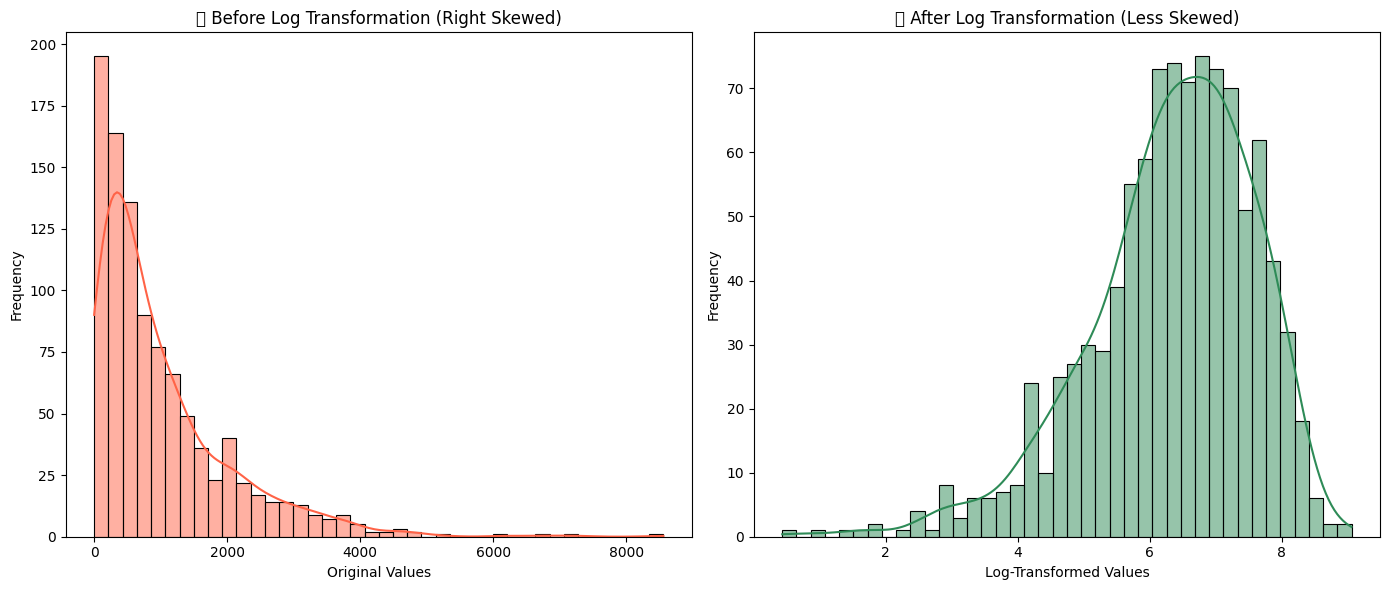

In [17]:
# Create synthetic skewed data (right-skewed)
np.random.seed(0)
data = np.random.exponential(scale=1000, size=1000)
df = pd.DataFrame({'Original': data})

# Apply log transformation
df['Log_Transformed'] = np.log1p(df['Original'])  # log1p = log(1 + x)

# Plot before and after
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Original'], bins=40, kde=True, color='tomato')
plt.title('📊 Before Log Transformation (Right Skewed)')
plt.xlabel('Original Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Transformed'], bins=40, kde=True, color='seagreen')
plt.title('📈 After Log Transformation (Less Skewed)')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
print(df)

        Original  Log_Transformed
0     795.874508         6.680697
1    1255.930763         7.136428
2     923.223146         6.828954
3     787.201152         6.669753
4     551.048491         6.313636
..           ...              ...
995   102.782029         4.642293
996   723.445993         6.585407
997  2787.288585         7.933183
998   259.608581         5.563020
999  1130.540030         7.031335

[1000 rows x 2 columns]


**b. Reciprocal Transformer**

When is it Useful?

1. Right-Skewed Data (Positively Skewed): If your data is right-skewed with very large values, applying the reciprocal transformation can help compress these large values and spread out smaller values, making the data distribution more symmetric.
2. Not Suitable for Zero or Negative Values

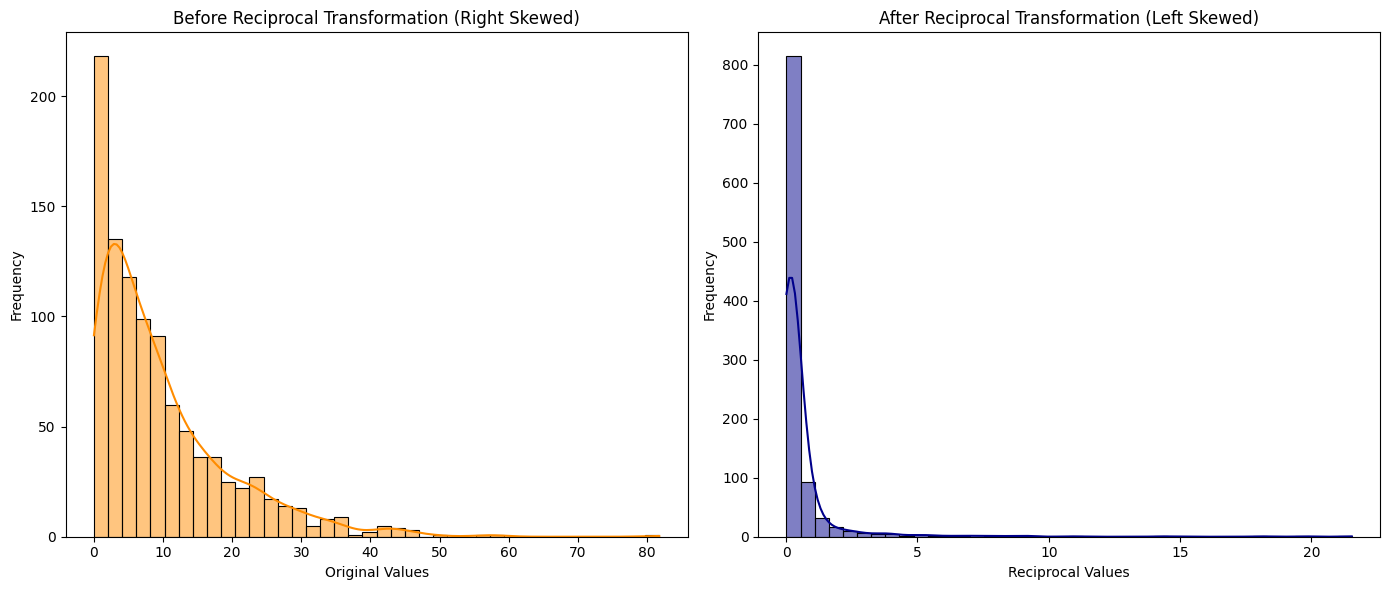

In [19]:
np.random.seed(42)
data = np.random.exponential(scale=10, size=1000)
df = pd.DataFrame({'Original': data})

# Apply reciprocal transformation (add epsilon to avoid div by zero)
epsilon = 1e-5
df['Reciprocal'] = 1 / (df['Original'] + epsilon)

# Plot before and after
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Original'], bins=40, kde=True, color='darkorange')
plt.title('Before Reciprocal Transformation (Right Skewed)')
plt.xlabel('Original Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Reciprocal'], bins=40, kde=True, color='darkblue')
plt.title('After Reciprocal Transformation (Left Skewed)')
plt.xlabel('Reciprocal Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**c. Square Transformer**

When to use it?

1. For left-skewed data: The square transformer can be used to amplify smaller values and compress larger values, helping to balance the distribution.
2. Data with small values:

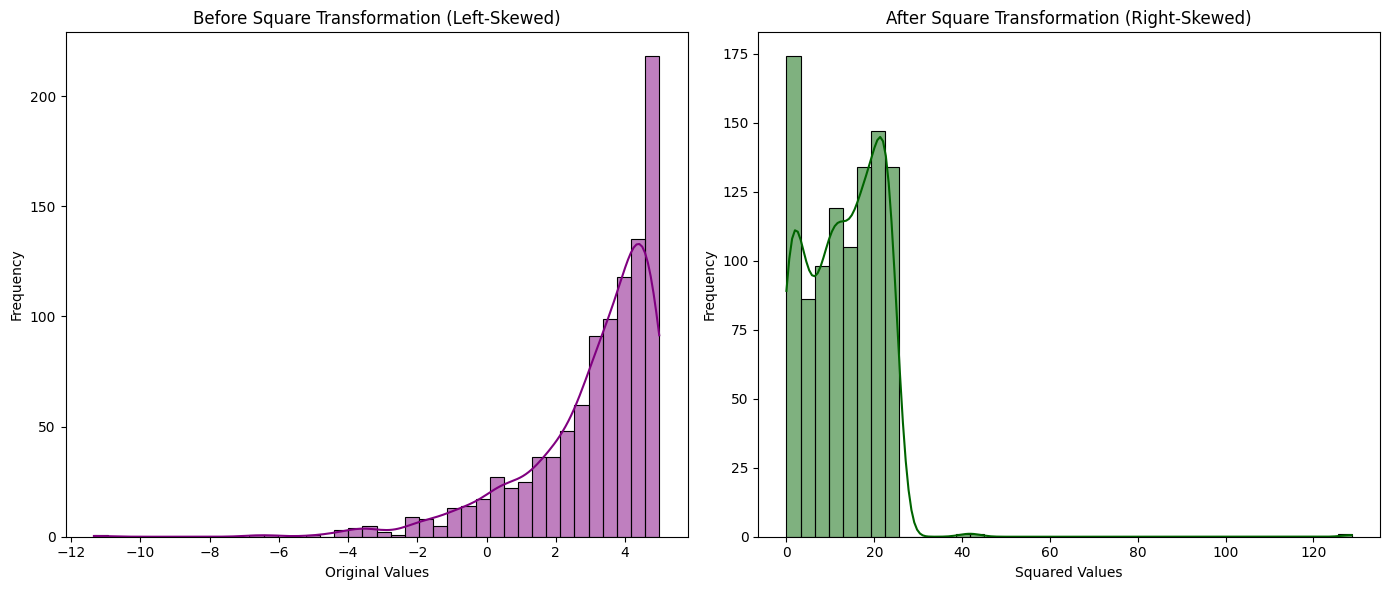

In [20]:
np.random.seed(42)
data = -np.random.exponential(scale=2.0, size=1000) + 5
df = pd.DataFrame({'Original': data})

# Apply square transformation
df['Squared'] = df['Original'] ** 2

# Plot before and after
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Original'], bins=40, kde=True, color='purple')
plt.title('Before Square Transformation (Left-Skewed)')
plt.xlabel('Original Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Squared'], bins=40, kde=True, color='darkgreen')
plt.title('After Square Transformation (Right-Skewed)')
plt.xlabel('Squared Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**d.Square Root Transformer (√x)**

When to use it?

1. For right-skewed data: The square root transformation helps compress large values (on the right side) and spread out smaller values (on the left side).
2. Moderate compression

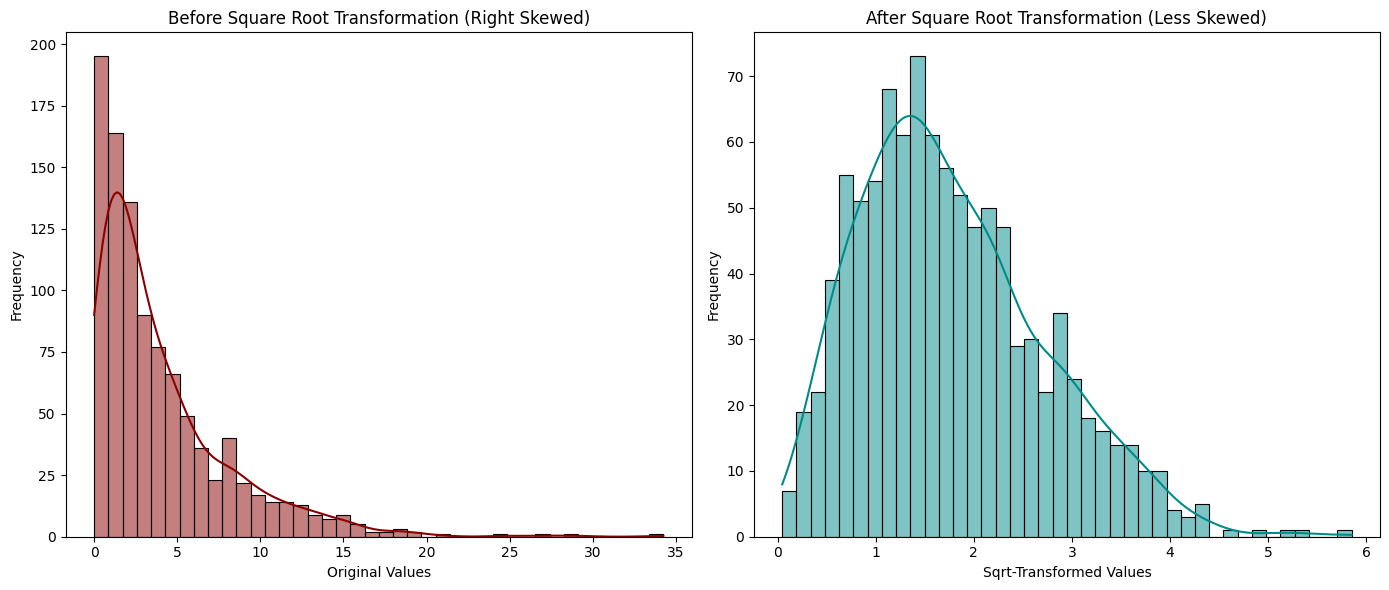

In [21]:
np.random.seed(0)
data = np.random.exponential(scale=4.0, size=1000)
df = pd.DataFrame({'Original': data})

# Apply square root transformation
df['Sqrt_Transformed'] = np.sqrt(df['Original'])

# Plot before and after
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Original'], bins=40, kde=True, color='darkred')
plt.title('Before Square Root Transformation (Right Skewed)')
plt.xlabel('Original Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Sqrt_Transformed'], bins=40, kde=True, color='darkcyan')
plt.title('After Square Root Transformation (Less Skewed)')
plt.xlabel('Sqrt-Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# USING FUNCTION TRANSFORMER

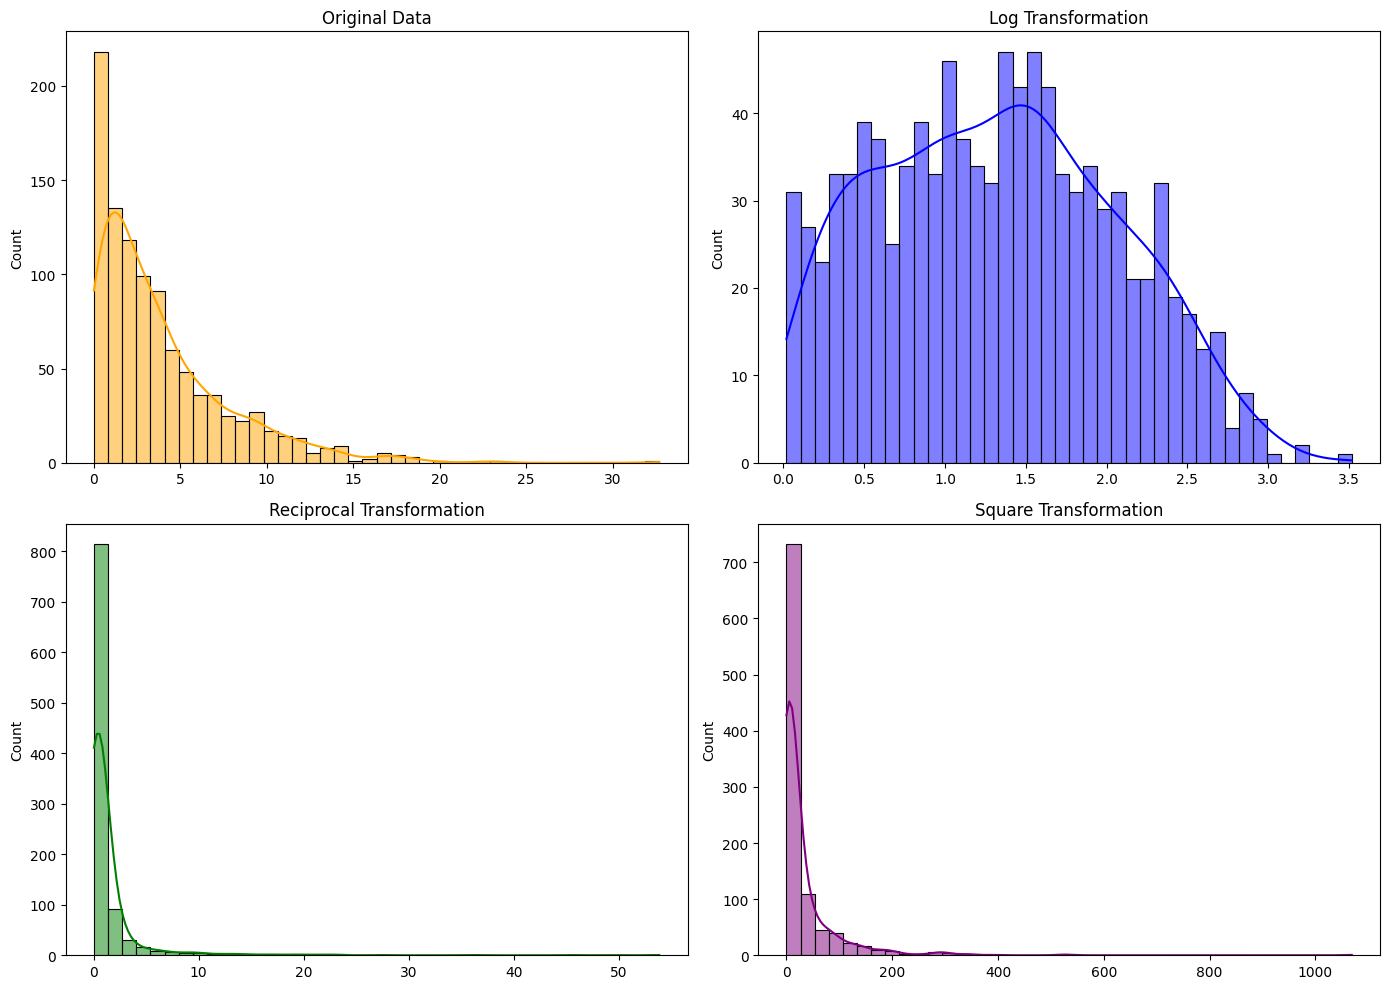

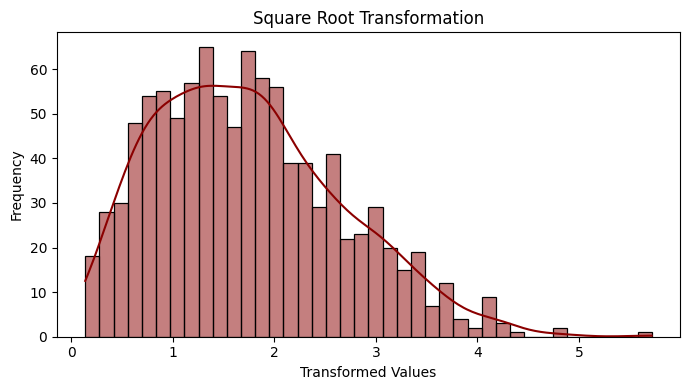

In [22]:
from sklearn.preprocessing import FunctionTransformer

# Create synthetic right-skewed data
np.random.seed(42)
data = np.random.exponential(scale=4.0, size=1000).reshape(-1, 1)  # sklearn expects 2D arrays

# Define FunctionTransformers
log_transformer = FunctionTransformer(np.log1p, validate=True)
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1e-5), validate=True)
square_transformer = FunctionTransformer(np.square, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# Apply transformations
log_data = log_transformer.fit_transform(data)
reciprocal_data = reciprocal_transformer.fit_transform(data)
square_data = square_transformer.fit_transform(data)
sqrt_data = sqrt_transformer.fit_transform(data)

# Plot all transformations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data.flatten(), bins=40, kde=True, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Original Data')

sns.histplot(log_data.flatten(), bins=40, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Log Transformation')

sns.histplot(reciprocal_data.flatten(), bins=40, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Reciprocal Transformation')

sns.histplot(square_data.flatten(), bins=40, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Square Transformation')

plt.tight_layout()
plt.show()

# Plot square root separately for clarity
plt.figure(figsize=(7, 4))
sns.histplot(sqrt_data.flatten(), bins=40, kde=True, color='darkred')
plt.title('Square Root Transformation')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2. Power Transformer 

**a. Yeo-Johnson Transformation**

The Yeo-Johnson transformation is similar to Box-Cox, but with one major difference: it works for both positive and negative data. This makes it more flexible.

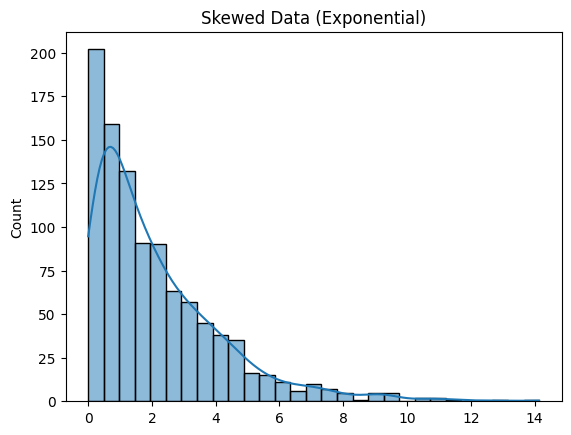

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.exponential(scale=2, size=1000)
sns.histplot(data, kde=True)
plt.title("Skewed Data (Exponential)")
plt.show()

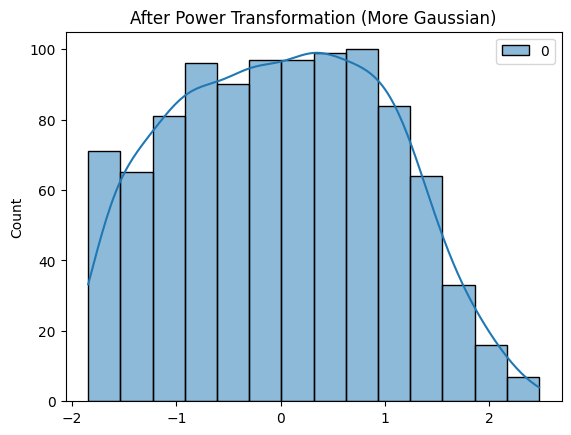

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # Can use 'box-cox' for strictly positive data
data_transformed = pt.fit_transform(data.reshape(-1, 1))

sns.histplot(data_transformed, kde=True)
plt.title("After Power Transformation (More Gaussian)")
plt.show()

**b. Box-Cox Transformation**
- Only strictly positive data

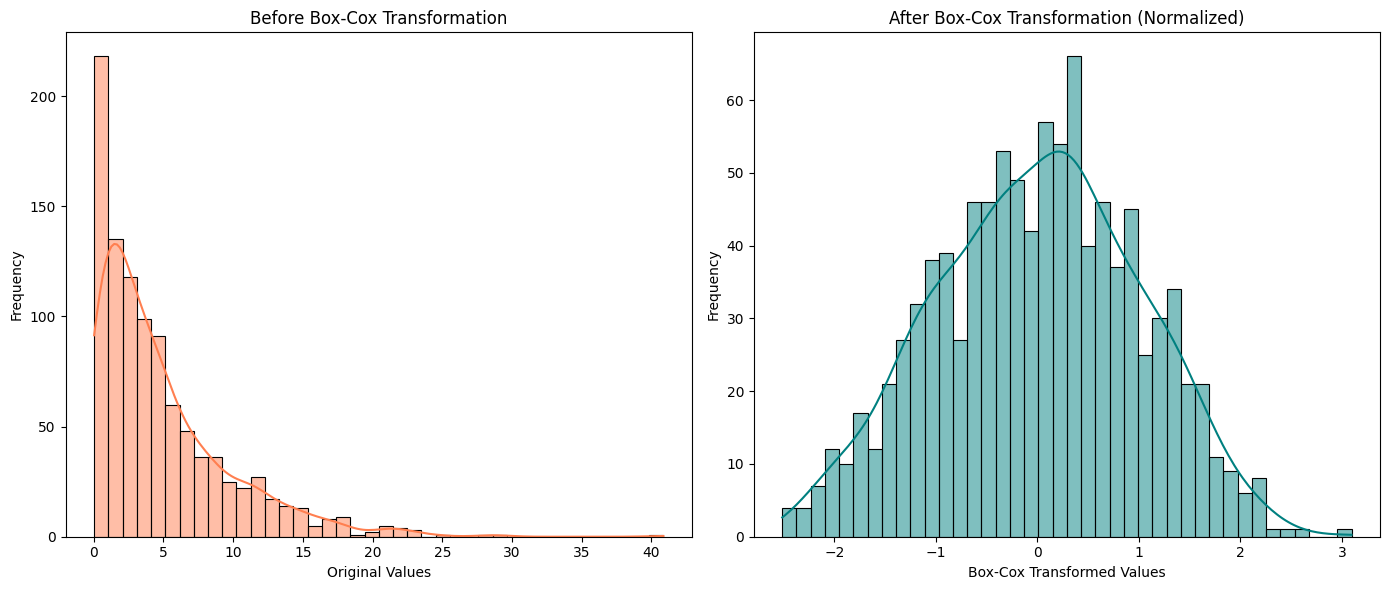

In [23]:
np.random.seed(42)
data = np.random.exponential(scale=5.0, size=1000).reshape(-1, 1)  # Exponential is right-skewed

# Apply Box-Cox transformation using PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=True)
boxcox_data = pt.fit_transform(data)

# Plot original vs transformed
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data.flatten(), bins=40, kde=True, color='coral')
plt.title('Before Box-Cox Transformation')
plt.xlabel('Original Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(boxcox_data.flatten(), bins=40, kde=True, color='teal')
plt.title('After Box-Cox Transformation (Normalized)')
plt.xlabel('Box-Cox Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Quantile Transformation**

The QuantileTransformer maps each data point to a target distribution (either uniform or normal) based on its rank (quantile) in the original data.

Two Output Options:
- output_distribution="uniform" → Data becomes uniformly distributed over [0, 1]
- output_distribution="normal" → Data becomes standard normal (mean ≈ 0, std ≈ 1)


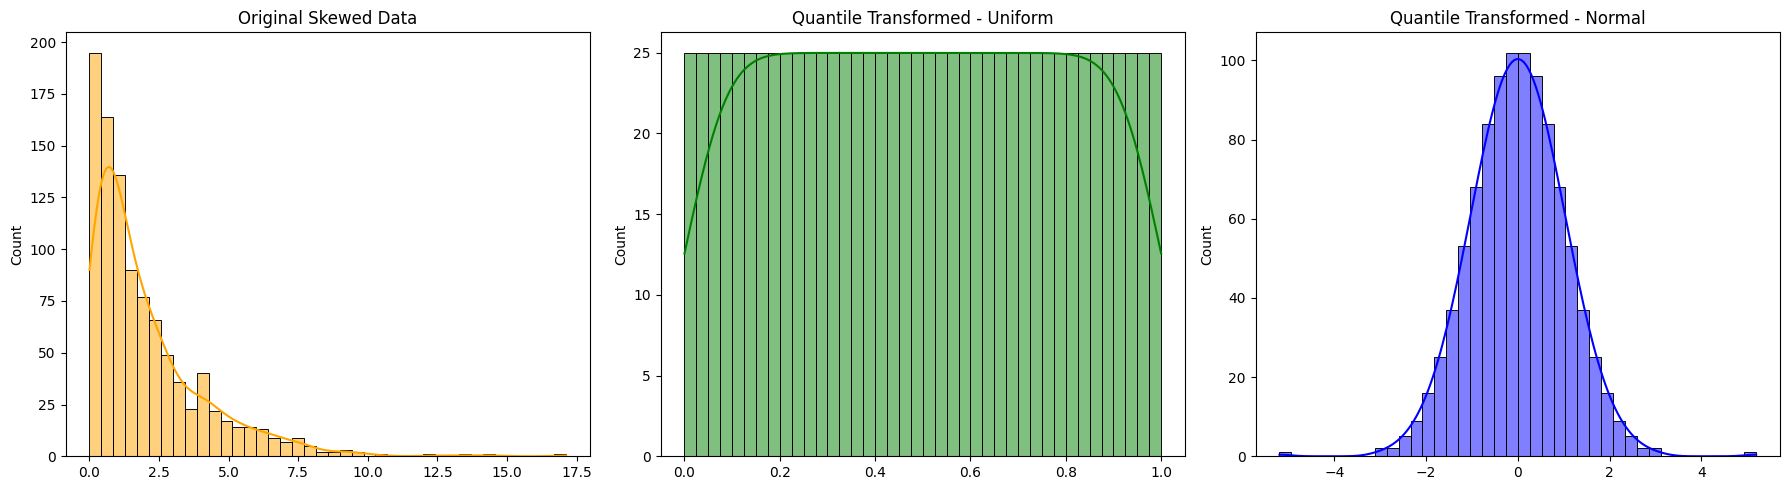

In [24]:
from sklearn.preprocessing import QuantileTransformer

# Generate skewed data
np.random.seed(0)
data = np.random.exponential(scale=2.0, size=1000).reshape(-1, 1)

# Apply QuantileTransformer to get uniform distribution
qt_uniform = QuantileTransformer(output_distribution='uniform', random_state=0)
data_uniform = qt_uniform.fit_transform(data)

# Apply QuantileTransformer to get normal distribution
qt_normal = QuantileTransformer(output_distribution='normal', random_state=0)
data_normal = qt_normal.fit_transform(data)

# Plot all distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data.flatten(), bins=40, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Original Skewed Data')

sns.histplot(data_uniform.flatten(), bins=40, kde=True, color='green', ax=axes[1])
axes[1].set_title('Quantile Transformed - Uniform')

sns.histplot(data_normal.flatten(), bins=40, kde=True, color='blue', ax=axes[2])
axes[2].set_title('Quantile Transformed - Normal')

plt.tight_layout()
plt.show()

## What is Normalization?
Normalization (in contrast to standardization) means scaling individual samples (rows) to have unit norm.

- L1 norm → Manhattan norm
- L2 norm → Euclidean norm

In [25]:
from sklearn.preprocessing import Normalizer

# Create a simple sample dataset
X = np.array([[3, 4],
              [1, 2],
              [10, 0],
              [0, 5]])

# Apply L1 Normalization
normalizer_l1 = Normalizer(norm='l1')
X_l1 = normalizer_l1.transform(X)

# Apply L2 Normalization
normalizer_l2 = Normalizer(norm='l2')
X_l2 = normalizer_l2.transform(X)

# Convert to DataFrame for better visualization
df_original = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df_l1 = pd.DataFrame(X_l1, columns=['Feature_1_L1', 'Feature_2_L1'])
df_l2 = pd.DataFrame(X_l2, columns=['Feature_1_L2', 'Feature_2_L2'])

# Display all together
print("Original Data:\n", df_original, "\n")
print("L1 Normalized:\n", df_l1, "\n")
print("L2 Normalized:\n", df_l2)

Original Data:
    Feature_1  Feature_2
0          3          4
1          1          2
2         10          0
3          0          5 

L1 Normalized:
    Feature_1_L1  Feature_2_L1
0      0.428571      0.571429
1      0.333333      0.666667
2      1.000000      0.000000
3      0.000000      1.000000 

L2 Normalized:
    Feature_1_L2  Feature_2_L2
0      0.600000      0.800000
1      0.447214      0.894427
2      1.000000      0.000000
3      0.000000      1.000000
